# Основная информация проекта

## Цель проекта
Выяснить, от каких самых малоприбыльных рейсов из Анапы можно отказаться в зимнее время.

## Описание датасета
1. **flight_id** - идентификатор рейса;
2. **flight_no** - номер рейса;
3. **aircraft_code** - код самолета;
4. **scheduled_flight_time** - планируемое время полета;
5. **actual_flight_time** - актуальное время полета;
6. **departure_airport** - аэропорт отправления;
7. **arrival_airport** - аэропорт прибытия;
8. **status** - статус рейса;
9. **arrival_city** - город прибытия;
10. **fuel_consumption_kg** - потребление топлива в кг. за час;
11. **business_seats** - количество мест для бизнес-класса;
12. **comfort_seats** - количество мест для комфорт-класса;
13. **economy_seats** - количество мест для эконом-класса;
14. **total_seats** - общее количество мест;
15. **business_tickets** - количество билетов бизнес-класса;
16. **comfort_tickets** - количество билетов комфорт-класса;
17. **economy_tickets** - количество билетов эконом-класса;
18. **total_tickets** - общее количество билетов;
19. **business_amount** - стоимость перелета для бизнес-класса;
20. **comfort_amount** - стоимость перелета для комфорт-класса;
21. **economy_amount** - стоимость перелета для эконом-класса;
22. **total_amount** - общая стоимость.

## Дополнительная информация
[Стоимость авиационного керосина в аэропортах Российской Федерации](https://favt.gov.ru/dejatelnost-ajeroporty-i-ajerodromy-ceny-na-aviagsm/?id=7329) для Анапы(2017г) в декабре  = 47 101, январе = 41 435 и в феврале = 39 553 за тонну.

# Импорт библиотек и загрузка данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.simplefilter('ignore')

%matplotlib inline

In [2]:
pd.set_option('display.max_rows',50)
pd.set_option('display.max_columns',50)

In [3]:
flights_data = pd.read_csv('flights_data.csv')

In [4]:
# Создадим датасет со стоимостью топлива с разбивкой по месяцам
data = {'mounth':[1,2,12],'price':[41435,39553,47101]}

fuel_price = pd.DataFrame(data)

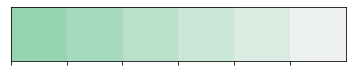

In [5]:
# Создадим цветовую панель для графиков
f_color = sns.light_palette("#95d5b2", reverse=True)
sns.palplot(sns.color_palette(f_color), size=1)

# Функции для обработки и анализа данных

In [6]:
def find_null(col):
    '''Функция подсчёта количества пустых значений в столбцах датасета'''
    empty_values = flights_data[col].isna().sum()
    print(
        f"В столбце '{col}' количество пропусков = {empty_values}.")
    return empty_values

In [7]:
def bar(dataframe, column, value, color):
    '''Функция для вывода данных о количестве проданных билетов 
    в зависимости от переданных параметров
    '''
    dataframe = dataframe.loc[dataframe[column] == value]
    val_count = dataframe.iloc[:, 16:20].sum().sort_values(ascending=False)
    col = 'Number of tickets per ' + value
    new_df = pd.DataFrame(val_count, columns=[col])
    display(new_df.style.bar(subset=[col], color=color))

# Обзор данных

In [8]:
display(flights_data.head(5))
flights_data.info()

,flight_id,flight_no,aircraft_code,scheduled_flight_time,actual_flight_time,actual_arrival,departure_airport,arrival_airport,status,model,arrival_city,fuel_consumption_kg,business_seats,comfort_seats,economy_seats,total_seats,business_tickets,comfort_tickets,economy_tickets,total_tickets,business_amount,comfort_amount,economy_amount,total_amount
0,136119,PG0252,733,100.0,101.0,2017-01-03T11:49:00Z,AAQ,SVO,Arrived,Boeing 737-300,Moscow,2600,12,0,118,130,11.0,0.0,102.0,113.0,402600.0,0.0,1250400.0,1653000.0
1,136120,PG0252,733,100.0,99.0,2017-02-24T11:46:00Z,AAQ,SVO,Arrived,Boeing 737-300,Moscow,2600,12,0,118,130,11.0,0.0,98.0,109.0,402600.0,0.0,1202800.0,1605400.0
2,136122,PG0252,733,100.0,100.0,2017-01-08T11:48:00Z,AAQ,SVO,Arrived,Boeing 737-300,Moscow,2600,12,0,118,130,10.0,0.0,87.0,97.0,366000.0,0.0,1065000.0,1431000.0
3,136130,PG0252,733,100.0,99.0,2017-02-13T11:46:00Z,AAQ,SVO,Arrived,Boeing 737-300,Moscow,2600,12,0,118,130,10.0,0.0,97.0,107.0,366000.0,0.0,1190600.0,1556600.0
4,136131,PG0252,733,100.0,99.0,2017-01-28T11:46:00Z,AAQ,SVO,Arrived,Boeing 737-300,Moscow,2600,12,0,118,130,12.0,0.0,112.0,124.0,439200.0,0.0,1373600.0,1812800.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   flight_id              127 non-null    int64  
 1   flight_no              127 non-null    object 
 2   aircraft_code          127 non-null    object 
 3   scheduled_flight_time  127 non-null    float64
 4   actual_flight_time     127 non-null    float64
 5   actual_arrival         127 non-null    object 
 6   departure_airport      127 non-null    object 
 7   arrival_airport        127 non-null    object 
 8   status                 127 non-null    object 
 9   model                  127 non-null    object 
 10  arrival_city           127 non-null    object 
 11  fuel_consumption_kg    127 non-null    int64  
 12  business_seats         127 non-null    int64  
 13  comfort_seats          127 non-null    int64  
 14  economy_seats          127 non-null    int64  
 15  total_

In [9]:
# Вывод количества строк и столбцов таблицы
print(
    f'Датасет состоит из {flights_data.shape[0]} строк и {flights_data.shape[1]} столбцов')

Датасет состоит из 127 строк и 24 столбцов


In [10]:
display(fuel_price)
fuel_price.info()

,mounth,price
0,1,41435
1,2,39553
2,12,47101


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   mounth  3 non-null      int64
 1   price   3 non-null      int64
dtypes: int64(2)
memory usage: 176.0 bytes


In [11]:
# Переведем из т.->кг. с учётом НДС
fuel_price['price'] = fuel_price['price']/1000 * 1.18

fuel_price

,mounth,price
0,1,48.89330
1,2,46.67254
2,12,55.57918


In [12]:
# Преобразуем в формат даты
flights_data['actual_arrival'] = pd.to_datetime(flights_data['actual_arrival'])

In [13]:
# Добавим данные о стоимости топлива в определенный месяц
flights_data['fuel_price'] = flights_data['actual_arrival'].dt.month.map(
    fuel_price.set_index('mounth').to_dict()['price'])

In [14]:
# Добавим столбы с затратами на перелет (планируемый и актуальный)
flights_data['scheduled_fuel_spent'] = flights_data['fuel_consumption_kg'] * flights_data['scheduled_flight_time']/60
flights_data['actual_fuel_spent'] = flights_data['fuel_consumption_kg'] * flights_data['actual_flight_time']/60

In [15]:
# Проверим пропущенные значения
for col in flights_data.columns:
    find_null(col)

В столбце 'flight_id' количество пропусков = 0.
В столбце 'flight_no' количество пропусков = 0.
В столбце 'aircraft_code' количество пропусков = 0.
В столбце 'scheduled_flight_time' количество пропусков = 0.
В столбце 'actual_flight_time' количество пропусков = 0.
В столбце 'actual_arrival' количество пропусков = 0.
В столбце 'departure_airport' количество пропусков = 0.
В столбце 'arrival_airport' количество пропусков = 0.
В столбце 'status' количество пропусков = 0.
В столбце 'model' количество пропусков = 0.
В столбце 'arrival_city' количество пропусков = 0.
В столбце 'fuel_consumption_kg' количество пропусков = 0.
В столбце 'business_seats' количество пропусков = 0.
В столбце 'comfort_seats' количество пропусков = 0.
В столбце 'economy_seats' количество пропусков = 0.
В столбце 'total_seats' количество пропусков = 0.
В столбце 'business_tickets' количество пропусков = 9.
В столбце 'comfort_tickets' количество пропусков = 9.
В столбце 'economy_tickets' количество пропусков = 9.
В ст

In [16]:
# Заполним пустые значения 0
flights_data = flights_data.fillna(0)

In [17]:
# Посчитаем выручку за перелеты
flights_data['profit'] = flights_data['total_amount'] - flights_data['fuel_price']*flights_data['actual_fuel_spent']
flights_data.profit = flights_data.profit.astype('int64')

In [18]:
# Посчитаем процент заполнения самолета
flights_data['percent'] = round((flights_data['total_tickets']/flights_data['total_seats']) * 100)

In [19]:
flights_data

,flight_id,flight_no,aircraft_code,scheduled_flight_time,actual_flight_time,actual_arrival,departure_airport,arrival_airport,status,model,arrival_city,fuel_consumption_kg,business_seats,comfort_seats,economy_seats,total_seats,business_tickets,comfort_tickets,economy_tickets,total_tickets,business_amount,comfort_amount,economy_amount,total_amount,fuel_price,scheduled_fuel_spent,actual_fuel_spent,profit,percent
0,136119,PG0252,733,100.0,101.0,2017-01-03 11:49:00+00:00,AAQ,SVO,Arrived,Boeing 737-300,Moscow,2600,12,0,118,130,11.0,0.0,102.0,113.0,402600.0,0.0,1250400.0,1653000.0,48.89330,4333.333333,4376.666667,1439010,87.0
1,136120,PG0252,733,100.0,99.0,2017-02-24 11:46:00+00:00,AAQ,SVO,Arrived,Boeing 737-300,Moscow,2600,12,0,118,130,11.0,0.0,98.0,109.0,402600.0,0.0,1202800.0,1605400.0,46.67254,4333.333333,4290.000000,1405174,84.0
2,136122,PG0252,733,100.0,100.0,2017-01-08 11:48:00+00:00,AAQ,SVO,Arrived,Boeing 737-300,Moscow,2600,12,0,118,130,10.0,0.0,87.0,97.0,366000.0,0.0,1065000.0,1431000.0,48.89330,4333.333333,4333.333333,1219129,75.0
3,136130,PG0252,733,100.0,99.0,2017-02-13 11:46:00+00:00,AAQ,SVO,Arrived,Boeing 737-300,Moscow,2600,12,0,118,130,10.0,0.0,97.0,107.0,366000.0,0.0,1190600.0,1556600.0,46.67254,4333.333333,4290.000000,1356374,82.0
4,136131,PG0252,733,100.0,99.0,2017-01-28 11:46:00+00:00,AAQ,SVO,Arrived,Boeing 737-300,Moscow,2600,12,0,118,130,12.0,0.0,112.0,124.0,439200.0,0.0,1373600.0,1812800.0,48.89330,4333.333333,4290.000000,1603047,95.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,136544,PG0194,733,305.0,304.0,2017-01-31 11:14:00+00:00,AAQ,NOZ,Arrived,Boeing 737-300,Novokuznetsk,2600,12,0,118,130,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,48.89330,13216.666667,13173.333333,-644087,0.0
123,136511,PG0194,733,305.0,310.0,2017-02-21 11:25:00+00:00,AAQ,NOZ,Arrived,Boeing 737-300,Novokuznetsk,2600,12,0,118,130,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46.67254,13216.666667,13433.333333,-626967,0.0
124,136540,PG0194,733,305.0,307.0,2017-01-17 11:21:00+00:00,AAQ,NOZ,Arrived,Boeing 737-300,Novokuznetsk,2600,12,0,118,130,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,48.89330,13216.666667,13303.333333,-650443,0.0
125,136546,PG0194,733,305.0,302.0,2017-01-03 11:15:00+00:00,AAQ,NOZ,Arrived,Boeing 737-300,Novokuznetsk,2600,12,0,118,130,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,48.89330,13216.666667,13086.666667,-639850,0.0


## Анализ пропущенных данных

In [20]:
# Выведем строки с перелётами без пассажиров (общее количество билетов = 0)
null_data = flights_data[flights_data['total_tickets'] == 0]
display(null_data)

,flight_id,flight_no,aircraft_code,scheduled_flight_time,actual_flight_time,actual_arrival,departure_airport,arrival_airport,status,model,arrival_city,fuel_consumption_kg,business_seats,comfort_seats,economy_seats,total_seats,business_tickets,comfort_tickets,economy_tickets,total_tickets,business_amount,comfort_amount,economy_amount,total_amount,fuel_price,scheduled_fuel_spent,actual_fuel_spent,profit,percent
118,136523,PG0194,733,305.0,312.0,2017-01-10 11:26:00+00:00,AAQ,NOZ,Arrived,Boeing 737-300,Novokuznetsk,2600,12,0,118,130,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,48.89330,13216.666667,13520.000000,-661037,0.0
119,136513,PG0194,733,305.0,310.0,2017-02-28 11:23:00+00:00,AAQ,NOZ,Arrived,Boeing 737-300,Novokuznetsk,2600,12,0,118,130,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46.67254,13216.666667,13433.333333,-626967,0.0
120,136514,PG0194,733,245.0,299.0,2017-02-07 11:13:00+00:00,AAQ,NOZ,Arrived,Boeing 737-300,Novokuznetsk,2600,12,0,118,130,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46.67254,10616.666667,12956.666667,-604720,0.0
121,136560,PG0194,733,305.0,305.0,2017-01-24 11:18:00+00:00,AAQ,NOZ,Arrived,Boeing 737-300,Novokuznetsk,2600,12,0,118,130,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,48.89330,13216.666667,13216.666667,-646206,0.0
122,136544,PG0194,733,305.0,304.0,2017-01-31 11:14:00+00:00,AAQ,NOZ,Arrived,Boeing 737-300,Novokuznetsk,2600,12,0,118,130,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,48.89330,13216.666667,13173.333333,-644087,0.0
123,136511,PG0194,733,305.0,310.0,2017-02-21 11:25:00+00:00,AAQ,NOZ,Arrived,Boeing 737-300,Novokuznetsk,2600,12,0,118,130,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46.67254,13216.666667,13433.333333,-626967,0.0
124,136540,PG0194,733,305.0,307.0,2017-01-17 11:21:00+00:00,AAQ,NOZ,Arrived,Boeing 737-300,Novokuznetsk,2600,12,0,118,130,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,48.89330,13216.666667,13303.333333,-650443,0.0
125,136546,PG0194,733,305.0,302.0,2017-01-03 11:15:00+00:00,AAQ,NOZ,Arrived,Boeing 737-300,Novokuznetsk,2600,12,0,118,130,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,48.89330,13216.666667,13086.666667,-639850,0.0
126,136567,PG0194,733,305.0,311.0,2017-02-14 11:23:00+00:00,AAQ,NOZ,Arrived,Boeing 737-300,Novokuznetsk,2600,12,0,118,130,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46.67254,13216.666667,13476.666667,-628990,0.0


In [21]:
# Создадим список идентификаторов рейса
null_list_id = list(null_data['flight_id'].unique())
null_list_id

[136523, 136513, 136514, 136560, 136544, 136511, 136540, 136546, 136567]

In [22]:
# Посчитаем планируемые и актуальные затраты для перелётов без пассажиров
scheduled_fuel_costs_all = null_data['scheduled_fuel_spent'] * null_data['fuel_price']
actual_fuel_costs_all = null_data['actual_fuel_spent'] * null_data['fuel_price']

In [23]:
# Разница между актуальными и планируемыми затратами по данным перелетам
display(actual_fuel_costs_all.sum()-scheduled_fuel_costs_all.sum())

152166.91966666747

In [24]:
# Проверим в какие города были перелёты без пассажиров
null_data['arrival_city'].unique()

array(['Novokuznetsk'], dtype=object)

In [25]:
# Проверим какие самолеты совершали перелёты
null_data['model'].unique()

array(['Boeing 737-300'], dtype=object)

Исходя из анализа пропущенных данных можно сделать вывод:
1. Уникальные значения городов показали, что рейсы(PG0194) совершались только в город Новокузнецк и только самолётом Boeing 737-300.
2. Либо в системе произошла ошибка и из-за этого для перелетов отсутствует информация о проданных билетах или данный рейс осуществлял перелёты без пассажиров. Соответственно, прибыли за эти рейсы = 0,что говорит о его убыточности;
3. Из плюсов, актуальные затраты на перелёт оказались меньше, чем планируемые.

## Проверка количества проданных билетов в зависимости от рейса, города и модели самолёта

In [26]:
for value in flights_data['flight_no'].unique():
    bar(flights_data, 'flight_no', value, '#95d5b2')

,Number of tickets per PG0252
total_tickets,6674.000000
economy_tickets,6054.000000
business_tickets,620.000000
comfort_tickets,0.000000


,Number of tickets per PG0480
total_tickets,5321.000000
economy_tickets,4668.000000
business_tickets,653.000000
comfort_tickets,0.000000


,Number of tickets per PG0194
total_tickets,0.000000
economy_tickets,0.000000
comfort_tickets,0.000000
business_tickets,0.000000


In [27]:
for value in flights_data['arrival_city'].unique():
    bar(flights_data, 'arrival_city', value, '#ff6b6b')

,Number of tickets per Moscow
total_tickets,6674.000000
economy_tickets,6054.000000
business_tickets,620.000000
comfort_tickets,0.000000


,Number of tickets per Belgorod
total_tickets,5321.000000
economy_tickets,4668.000000
business_tickets,653.000000
comfort_tickets,0.000000


,Number of tickets per Novokuznetsk
total_tickets,0.000000
economy_tickets,0.000000
comfort_tickets,0.000000
business_tickets,0.000000


In [28]:
for value in flights_data['model'].unique():
    bar(flights_data, 'model', value, '#a2d2ff')

,Number of tickets per Boeing 737-300
total_tickets,6674.000000
economy_tickets,6054.000000
business_tickets,620.000000
comfort_tickets,0.000000


,Number of tickets per Sukhoi Superjet-100
total_tickets,5321.000000
economy_tickets,4668.000000
business_tickets,653.000000
comfort_tickets,0.000000


Исходя из анализа проданных билетах можно сделать вывод:
1. Билеты до города Новокузнец отсутствуют. Можно удалить данные строчки для дальнейшего анализа

In [29]:
# Удаление строк с пустыми значениями
flights_data = flights_data[flights_data['total_tickets'] != 0]

## Анализ прибыли

Text(0, 0.5, 'Прибыль')

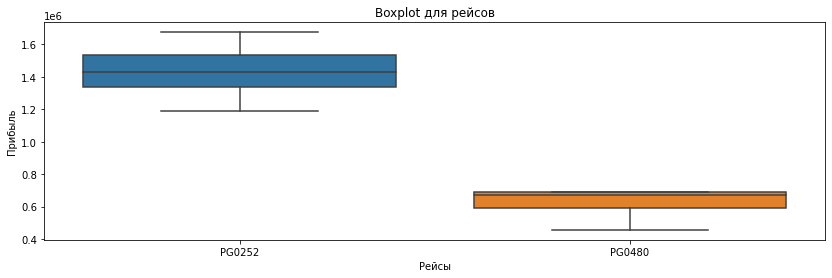

In [30]:
# Вывод графиков boxplot для моделей самолетов
fig, ax = plt.subplots(figsize=(14,4))
sns.boxplot(x='flight_no', y ='profit', data=flights_data)
ax.set_title('Boxplot для рейсов')
ax.set_xlabel('Рейсы')
ax.set_ylabel('Прибыль')

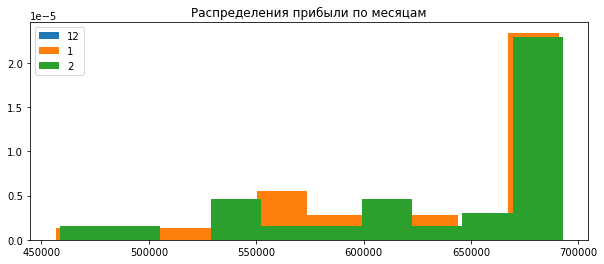

In [31]:
# Вывод распределения прибыли по месяцам в зависимости от рейса
fig, ax = plt.subplots(figsize=(10, 4))
for i in (12,1,2):
    d = flights_data['profit'][(flights_data['flight_no'] == 'PG0480')
                               & (flights_data['actual_arrival'].dt.month == i)]
    ax.hist(d, 10, density=True, histtype='bar', label=i)
    ax.legend(prop={'size': 10})
    ax.set_title('Распределения прибыли по месяцам')

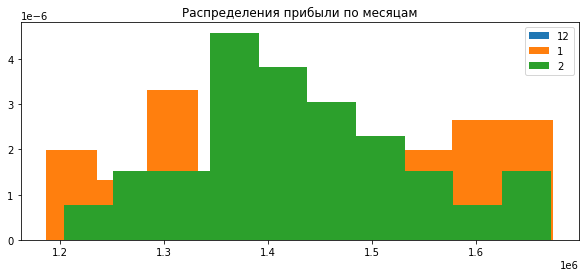

In [32]:
# Вывод распределения прибыли по месяцам в зависимости от рейса
fig, ax = plt.subplots(figsize=(10, 4))
for i in (12,1,2):
    d = flights_data['profit'][(flights_data['flight_no'] == 'PG0252')
                               & (flights_data['actual_arrival'].dt.month == i)]
    ax.hist(d, 10, density=True, histtype='bar', label=i)
    ax.legend(prop={'size': 10})
    ax.set_title('Распределения прибыли по месяцам')

In [33]:
# Вывод перелетов, где процент заполнения самолета меньше или равен 75%
data_percent = flights_data[flights_data['percent'] <= 75]
data_percent

,flight_id,flight_no,aircraft_code,scheduled_flight_time,actual_flight_time,actual_arrival,departure_airport,arrival_airport,status,model,arrival_city,fuel_consumption_kg,business_seats,comfort_seats,economy_seats,total_seats,business_tickets,comfort_tickets,economy_tickets,total_tickets,business_amount,comfort_amount,economy_amount,total_amount,fuel_price,scheduled_fuel_spent,actual_fuel_spent,profit,percent
2,136122,PG0252,733,100.0,100.0,2017-01-08 11:48:00+00:00,AAQ,SVO,Arrived,Boeing 737-300,Moscow,2600,12,0,118,130,10.0,0.0,87.0,97.0,366000.0,0.0,1065000.0,1431000.0,48.89330,4333.333333,4333.333333,1219129,75.0
38,136360,PG0252,733,100.0,100.0,2017-02-05 11:48:00+00:00,AAQ,SVO,Arrived,Boeing 737-300,Moscow,2600,12,0,118,130,11.0,0.0,86.0,97.0,402600.0,0.0,1052800.0,1455400.0,46.67254,4333.333333,4333.333333,1253152,75.0
68,136642,PG0480,SU9,50.0,49.0,2017-01-30 10:17:00+00:00,AAQ,EGO,Arrived,Sukhoi Superjet-100,Belgorod,1864,12,0,85,97,10.0,0.0,54.0,64.0,189000.0,0.0,342000.0,531000.0,48.89330,1553.333333,1522.266667,456571,66.0
93,136807,PG0480,SU9,50.0,50.0,2017-02-23 10:18:00+00:00,AAQ,EGO,Arrived,Sukhoi Superjet-100,Belgorod,1864,12,0,85,97,8.0,0.0,60.0,68.0,151200.0,0.0,379800.0,531000.0,46.67254,1553.333333,1553.333333,458501,70.0


In [34]:
# Создадим список идентификаторов рейса
list_id = list(data_percent['flight_id'].unique())
list_id

[136122, 136360, 136642, 136807]

In [35]:
# Подсчет среднего значения прибыли для рейса PG0252  
mean_profit_PG0252 = flights_data['profit'][flights_data['flight_no'] == 'PG0252'].mean()

In [36]:
# Подсчет среднего значения прибыли для рейса PG0480  
mean_profit_PG0480 = flights_data['profit'][flights_data['flight_no'] == 'PG0480'].mean()

In [37]:
# Отклонение минимального значения прибыли для заполнености
# рейса ~ 75% от среднего значения прибыли для рейса PG0252
mean_profit_PG0252 - \
    data_percent[data_percent['flight_no'] == 'PG0252']['profit'].min()

216500.2881355933

In [38]:
# Отклонение минимального значения прибыли для заполнености
# рейса ~ 75% от среднего значения прибыли для рейса PG0480
mean_profit_PG0480 - \
    data_percent[data_percent['flight_no'] == 'PG0480']['profit'].min()

179427.13559322036

In [39]:
data_percent[data_percent['flight_no'] == 'PG0480']['profit']/mean_profit_PG0480

68    0.717881
93    0.720916
Name: profit, dtype: float64

In [40]:
data_percent[data_percent['flight_no'] == 'PG0252']['profit']/mean_profit_PG0252

2     0.849195
38    0.872894
Name: profit, dtype: float64

In [41]:
# Создание списка столбцов для аналица
col = ['actual_flight_time', 'business_tickets', 'economy_tickets', 'total_tickets',
       'business_amount', 'economy_amount', 'total_amount', 'fuel_price', 'percent','profit']

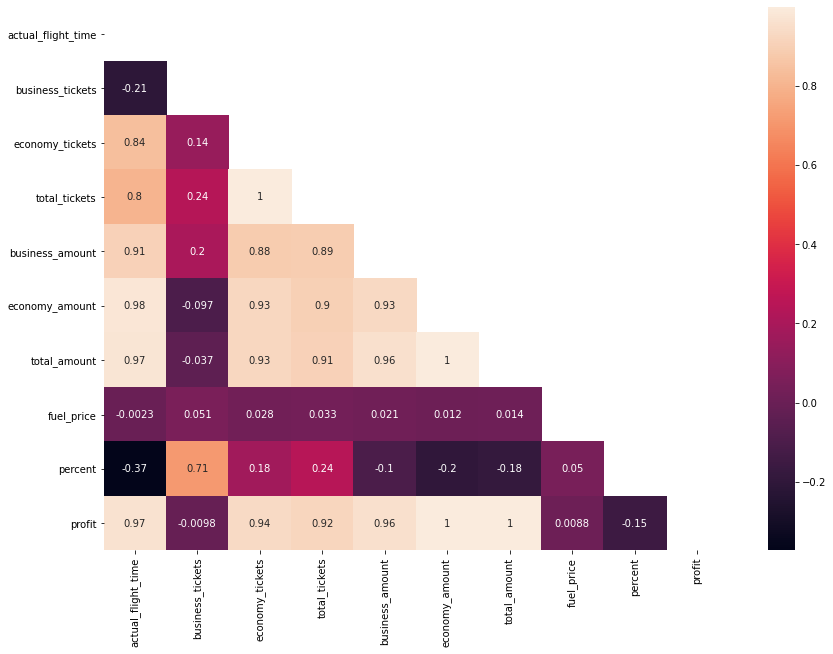

In [42]:
plt.figure(figsize=(14, 10))
correlation_data = flights_data[col].corr()
mask = np.triu(correlation_data)
sns.heatmap(correlation_data, mask=mask, annot=True)
plt.show()

Исходя из анализа прибыли можно сделать вывод:
1. Так как данные о проданных билетах для рейса PG0194 отсутствуют, можно сделать вывод, что данный рейс в зимний период необходимо исключить;
2. Из распределения выручки по месяцам видно, что данные в декабре отсутствуют.


In [43]:
# Общий список идентификаторов рейса
all_id = null_list_id+list_id
all_id

[136523,
 136513,
 136514,
 136560,
 136544,
 136511,
 136540,
 136546,
 136567,
 136122,
 136360,
 136642,
 136807]

In [44]:
list_id

[136122, 136360, 136642, 136807]

## Итоги

1. Отсутствие данных для рейса № PG0194 говорит о возможной ошибки в системе или о перелетах без пассажиров на данном рейсе. Необходимо дальнейшее разбирательство на эту тему;
2. Распределение прибыли по месяцам в зависимости от рейсов показало:<br>
    2.1. Для каждого рейса отсутствуют перелеты в Декабре;<br>
    2.2. Минимальная прибыль по рейсам для каждого месяца примерно равна.<br>
    2.3. Перелеты с заполненостью ~75% имеют прибыль из пункта 2.2. Однако, прибыль таких рейсов составляет ~3/4 от среднего значения прибыли, что говорит о их прибыльности.<br>
Возможно, добавление нескольких рейсов в Декабре со скидкой повысит зимнюю прибыль. 
3. 136122,136360,136642,136807 - Предварительный список нерентабельных рейсов, для которых необходимо рассмотреть политику формирования цен на билеты чтобы повысить прибыль.